In [1]:
import json
import seaborn as sns
import us
import geopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytz import timezone
from datetime import datetime

In [2]:
full_pd = pd.DataFrame()

In [2]:
combined_pd = pd.read_csv("data/combine_state.csv")

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4,5,7,10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
fileName = ['data/2015_03_23_sample.csv', 'data/2015_05_15_sample.csv','data/2015_07_09_sample.csv',
            'data/2015_12_31_sample.csv','data/2016_02_05_sample.csv']
for name in fileName:
    part_pd = pd.read_csv(name, lineterminator = "\n")
    part_pd = part_pd[part_pd['location'].notnull()] 
    part_pd = part_pd[part_pd['screen_name'].notnull()]
    full_pd = pd.concat([full_pd,part_pd])
    
part_pd = None    
full_pd.head()


created_at  \
2  Wed Feb 25 17:08:02 +0000 2015   
6  Sat Jun 25 08:11:47 +0000 2011   
7  Wed Jan 07 04:47:51 +0000 2015   
8  Sun Aug 03 21:05:59 +0000 2014   
9  Sun Dec 16 07:47:19 +0000 2012   

                                         description          id      id_str  \
2  skrillex ♥ ||Wsp:2235053144|| Te amo con mi co...  3062624885  3062624885   
6                                    ∅ S.E.C.R.E.T ∅   323700962   323700962   
7  بكـتـب بـيـوت الشـعـر وألـعـب واغـنـيبـيــوت ي...  2965533076  2965533076   
8  Insert pretenious crap about myself here. skil...  2732753069  2732753069   
9  UTAUとボカロと動物と廃墟と、絵を描くのが大好き。RT魔な奴だよ( ^ω^ )フォロバは興...  1014710425  1014710425   

        location  favourites_count  followers_count  friends_count  \
2  Con mi novia♥               131              323            302   
6       ✂UNKNOWN               296              211            422   
7            دبي                65               13             14   
8        Jamaica                12            60634          52019   
9    三重とテトさんの頭の上              2465              359            385   

     screen_name  statuses_count  verified  listed_count  geo place lang  
2       lukas_oc            2452     False           0.0  NaN   NaN   es  
6  ZulhilmiNajmi             616     False           0.0  NaN   NaN   in  
7   henuxikazaxu           13070     False           0.0  NaN   NaN   ar  
8    TheKidNiney              46     False          30.0  NaN   NaN   in  
9    hpsekkayuhu           42400     False          10.0  NaN   NaN   ja

In [17]:
full_pd.shape

(2204124, 15)

In [4]:
# tweet_pd = pd.concat([combined_pd, full_pd])
tweet_pd = combined_pd

In [5]:
tweet_pd = tweet_pd.reset_index()

In [6]:
tweet_pd.shape

(2222869, 16)

In [7]:
tweet_pd.head()

index                      created_at  \
0      0  Sat Jun 07 16:18:08 +0000 2014   
1      1  Sat Jun 07 16:18:08 +0000 2014   
2      2  Tue Apr 26 20:17:29 +0000 2016   
3      3  Fri May 31 13:00:11 +0000 2013   
4      4  Mon Oct 15 03:28:18 +0000 2018   

                                         description  favourites_count  \
0                                                NaN            6923.0   
1                                                NaN            6923.0   
2                                                NaN           74775.0   
3                         jeune homme d'affaire 📝😁           46887.0   
4  Just a regular guy. Love Chicago Cubs/Baseball...             730.0   

   followers_count friends_count  geo            id               id_str  \
0            752.0           606  NaN  2.552891e+09           2552891030   
1            752.0           606  NaN  2.552891e+09           2552891030   
2            294.0           380  NaN  7.250562e+17   725056222009909250   
3            600.0          1055  NaN  1.472121e+09           1472120575   
4           1530.0          2896  NaN  1.051676e+18  1051676108599558145   

   listed_count         location place      screen_name  statuses_count  \
0           NaN       Argentina    NaN     milagrosbar_         13514.0   
1           NaN       Argentina    NaN     milagrosbar_         13514.0   
2           NaN  California, USA   NaN     lesliejoan58         61129.0   
3           NaN  Abidjan, cocody   NaN        LoicYvans         24769.0   
4           NaN   Wisconsin, USA   NaN  MichaelHasenst2          1099.0   

     us_state verified  
0    Missouri      NaN  
1    Missouri      NaN  
2  California      NaN  
3    Nebraska      NaN  
4   Wisconsin      NaN

In [8]:
print(tweet_pd.shape)
print(tweet_pd.columns)

(2222869, 16)
Index([u'index', u'created_at', u'description', u'favourites_count',
       u'followers_count', u'friends_count', u'geo', u'id', u'id_str',
       u'listed_count', u'location', u'place', u'screen_name',
       u'statuses_count', u'us_state', u'verified'],
      dtype='object')


In [9]:
tw_state = tweet_pd.groupby(['us_state']).size().reset_index(name='freq')
tw_state = tw_state.sort_values(ascending = False, by = 'freq')
tw_state["type"] = "tweets" 

In [10]:
tw_state.head(6)

us_state   freq    type
79       Texas  97613  tweets
13  California  70396  tweets
47    Missouri  57598  tweets
30    Illinois  52360  tweets
26     Georgia  40812  tweets
55    New York  39617  tweets

In [11]:
check_usr = tweet_pd.groupby(['us_state', 'screen_name']).size().reset_index(name='freq')
check_usr = check_usr.groupby(['us_state']).size().reset_index(name='freq')
check_usr = check_usr.sort_values(ascending = False, by = 'freq')
check_usr["type"] = "users" 

In [12]:
check_usr.head(6)

us_state   freq   type
79       Texas  76810  users
13  California  54722  users
47    Missouri  47331  users
30    Illinois  42021  users
55    New York  30366  users
26     Georgia  30191  users

In [9]:
tw_vis = pd.concat([tw_state.head(10), check_usr.head(10)])

In [10]:
tw_vis

us_state   freq    type
79        Texas  97613  tweets
13   California  70396  tweets
47     Missouri  57598  tweets
30     Illinois  52360  tweets
26      Georgia  40812  tweets
55     New York  39617  tweets
25      Florida  38212  tweets
34       Kansas  36487  tweets
46  Mississippi  33712  tweets
32         Iowa  30775  tweets
79        Texas  76810   users
13   California  54722   users
47     Missouri  47331   users
30     Illinois  42021   users
55     New York  30366   users
26      Georgia  30191   users
25      Florida  29159   users
34       Kansas  28042   users
32         Iowa  24612   users
46  Mississippi  24142   users

In [11]:
tweet_full = pd.merge(check_usr, tw_state, on='us_state')

In [12]:
tweet_full.head(10)

us_state  freq_x type_x  freq_y  type_y
0        Texas   76810  users   97613  tweets
1   California   54722  users   70396  tweets
2     Missouri   47331  users   57598  tweets
3     Illinois   42021  users   52360  tweets
4     New York   30366  users   39617  tweets
5      Georgia   30191  users   40812  tweets
6      Florida   29159  users   38212  tweets
7       Kansas   28042  users   36487  tweets
8         Iowa   24612  users   30775  tweets
9  Mississippi   24142  users   33712  tweets

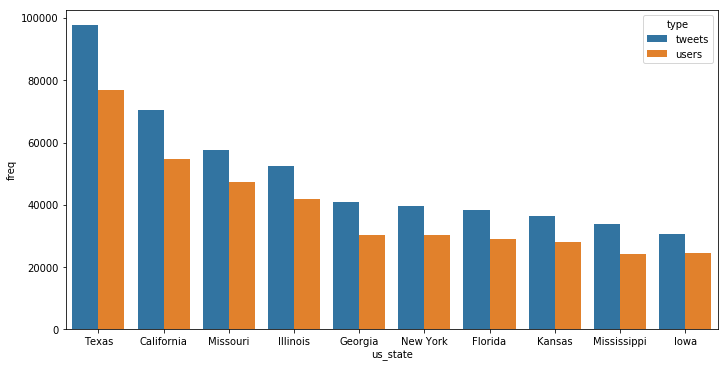

In [13]:
_, ax1 = plt.subplots(1,1, figsize=(10, 5), constrained_layout=True)
sns.barplot(x= "us_state", y="freq", data = tw_vis , ax = ax1, hue="type")

In [14]:
sns.set_style("darkgrid")

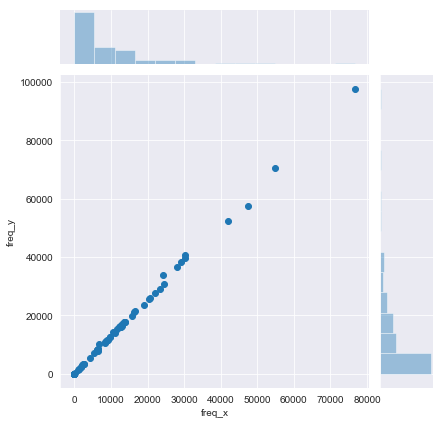

In [15]:
sns.jointplot(x="freq_x", y="freq_y", data=tweet_full)

In [16]:
def latZones(x):
    zone1 = ['Wisconsin','Washington','Montana','North Dakota','Michigan','Oregon','South Dakota','Minnesota','Idaho','Iowa','Pennsylvania','New York','Connecticut','Rhode Island','Vermont','New Hampshire','Virginia','Massachusetts','Maine','District of Columbia']
    zone2 = ['New Jersey','Illinois','Wyoming','Maryland','West Virginia','Ohio','Delaware','Indiana','Kentucky','Missouri','Kansas','Colorado','Utah','Nevada','California','Nebraska','Tennessee','North Carolina']
    zone3 = ['Arkansas','New Mexico','Arizona','Texas','Oklahoma','Louisiana','Mississippi','Alabama','Georgia','South Carolina','Florida']
    
    if x in zone1:
        return "North"
    elif x in zone2 :
        return "Central"
    elif x in zone3:
        return "South"
    return -1



tweet_pd['Latitude Belt'] = tweet_pd['us_state'].transform(latZones)    

In [17]:
lat_pd = tweet_pd.groupby(['Latitude Belt']).size().reset_index(name='Freq')
lat_pd = lat_pd.sort_values(ascending = False, by = 'Freq')

In [18]:
lat_pd

Latitude Belt     Freq
0            -1  1206354
1       Central   406201
3         South   328353
2         North   281961

In [19]:
lat_pd = lat_pd[lat_pd['Latitude Belt']!=-1]

In [45]:
def belts(x):
    sun_belt = ['Texas','California','Missouri','Florida','Mississippi','New Mexico','Arizona','Alabama','Arkansas','Louisiana','Nevada','Tennessee',"Utah",'District of Columbia']
    frost_belt = ['New York','Minnesota','New Jersey','Illinois','Massachusetts','Connecticut','Rhode Island','Vermont','Maine', 'Wiscosin','Michigan','Pennsylvania','Ohio','Indiana','South Dakota','Iowa','Virginia','West Virginia']
    
    if x in sun_belt:
        return "Sun Belt"
    elif x in frost_belt:
        return "Frost Belt"
    else:
        return -1
    
tweet_pd['Climate Belt'] = tweet_pd['us_state'].transform(belts)

In [40]:
import calendar
def tz_month(x):
    c_t = x[0]
    tzinfo = x[1]
    try:
        datetime_object = datetime.strptime(c_t, '%a %b %d %H:%M:%S +0000 %Y')
        t = timezone(tzinfo)
        g = timezone('GMT')
        g_d = g.localize(datetime_object)
        e_d = g_d.astimezone(t)
    except:
        return -1

    return calendar.month_name[e_d.month]


def season(x):
    spring = ['March','April','May']
    summer = ['June','July','August']
    fall = ['September','October','November']
    winter = ['December','January','February']
    
    if x in spring:
        return "spring"
    if x in summer:
        return "summer"
    if x in fall:
        return "fall"
    if x in winter:
        return "winter"
    print(x)
    return "seasonless"
    
    
# tweet_pd["month"] = tweet_pd[["created_at","timezone"]].apply(lambda x: tz_month(x.values), axis=1)

In [30]:
month_pd = tweet_pd.groupby(['month']).size().reset_index(name='Freq')
month_pd = month_pd.sort_values(ascending = False, by = 'Freq')
month_pd = month_pd[month_pd['month']!=-1]
month_pd.head(12)

month   Freq
5        July  96650
7       March  91953
1      August  91323
6        June  90911
10    October  90557
8         May  89109
0       April  88340
4     January  87709
11  September  85845
3    February  77544
9    November  76415
2    December  72931

In [41]:
tweet_pd["season"] = tweet_pd["month"].transform(season)

In [42]:
tweet_pd["season"].head()

0    summer
1    summer
2    spring
3    spring
4      fall
Name: season, dtype: object

In [38]:
tweet_pd["month"].head(12)
st_list = list(month_pd['month'].unique())
st_list

['July',
 'March',
 'August',
 'June',
 'October',
 'May',
 'April',
 'January',
 'September',
 'February',
 'November',
 'December']

In [53]:
sun_pd = tweet_pd[tweet_pd['Climate Belt']=='Sun Belt']
frost_pd = tweet_pd[tweet_pd['Climate Belt']=='Frost Belt']


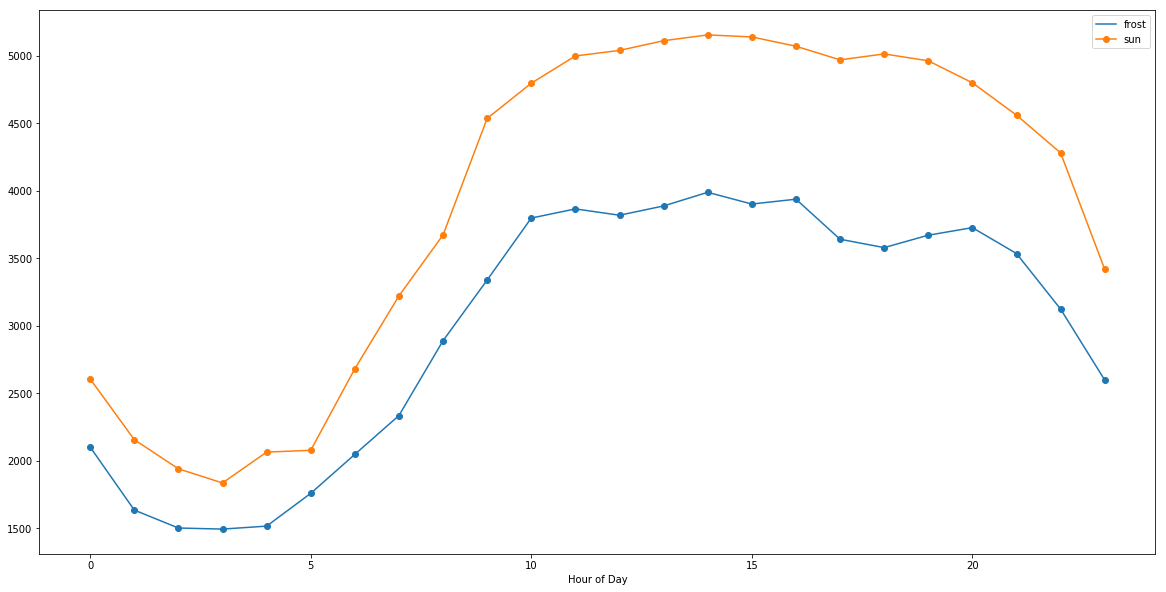

In [57]:
st_list = ['summer','winter','fall']
_, ax = plt.subplots(figsize=(20,10))
st = 'winter'
df_f = frost_pd[frost_pd['season'] == st]
df_ft = df_f.groupby('Hour of Day').size().reset_index(name='frost')
df_ft.plot.line(x='Hour of Day', y='frost', marker = 'o', ax=ax)

df_s = sun_pd[sun_pd['season'] == st]
df_st = df_s.groupby('Hour of Day').size().reset_index(name='sun')
df_st.plot.line(x='Hour of Day', y='sun', marker = 'o', ax=ax)

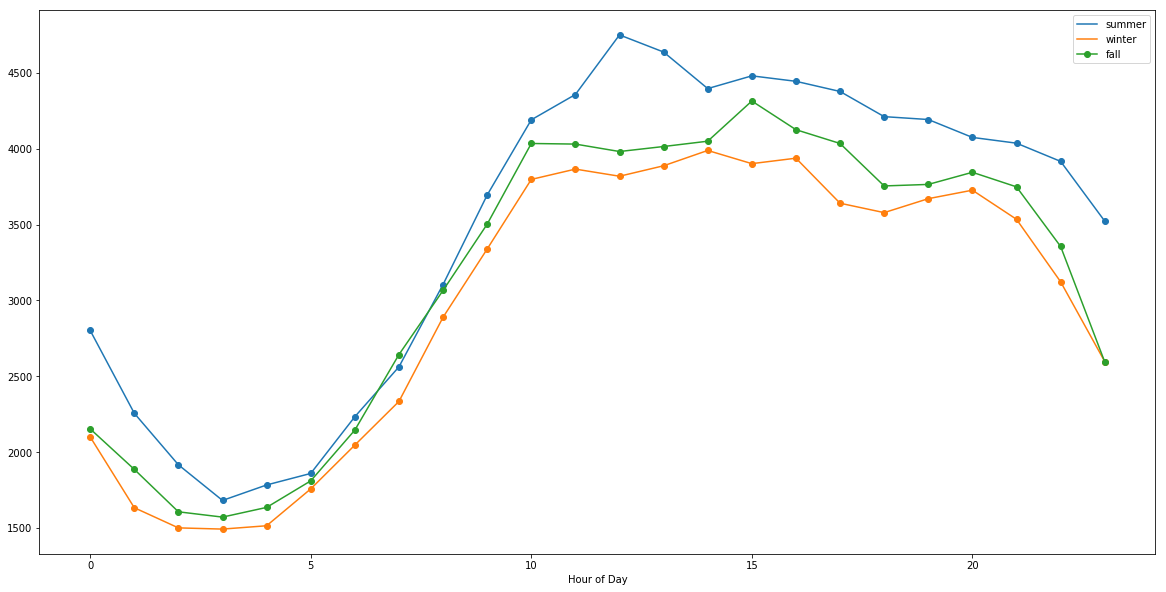

In [52]:

st_list = ['summer','winter','fall']
_, ax = plt.subplots(figsize=(20,10))

for st in st_list:
    df_s = frost_pd[frost_pd['season'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

In [46]:
climate_pd = tweet_pd.groupby(['Climate Belt']).size().reset_index(name='Freq')
climate_pd = climate_pd.sort_values(ascending = False, by = 'Freq')

In [22]:
climate_pd

Climate Belt     Freq
0           -1  1498079
2     Sun Belt   412119
1   Frost Belt   312671

In [23]:
climate_pd = climate_pd[climate_pd['Climate Belt']!=-1]

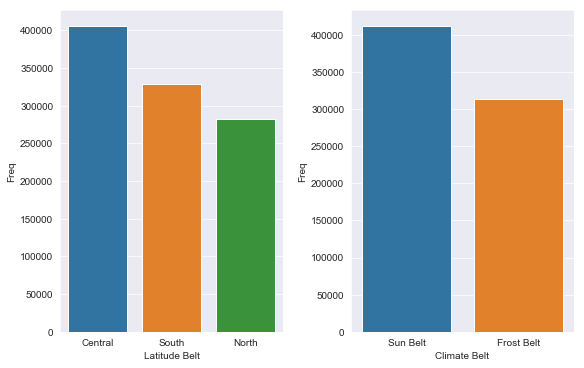

In [24]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 5), constrained_layout=True)
sns.barplot(x= "Latitude Belt", y="Freq", data = lat_pd , ax = ax1)
sns.barplot(x= "Climate Belt", y="Freq", data = climate_pd , ax = ax2)


In [60]:
#verified
tweet_pd['verified'] = tweet_pd['verified'].astype('str')

tweet_pd['v_status'] = tweet_pd['verified'].transform(lambda x : x if x == 'True' else 'False')


In [71]:
verified_pd = tweet_pd[tweet_pd['v_status']=='True']


Text(0.5,1,'Frequency of Tweets as per Local Time in U.S. States')

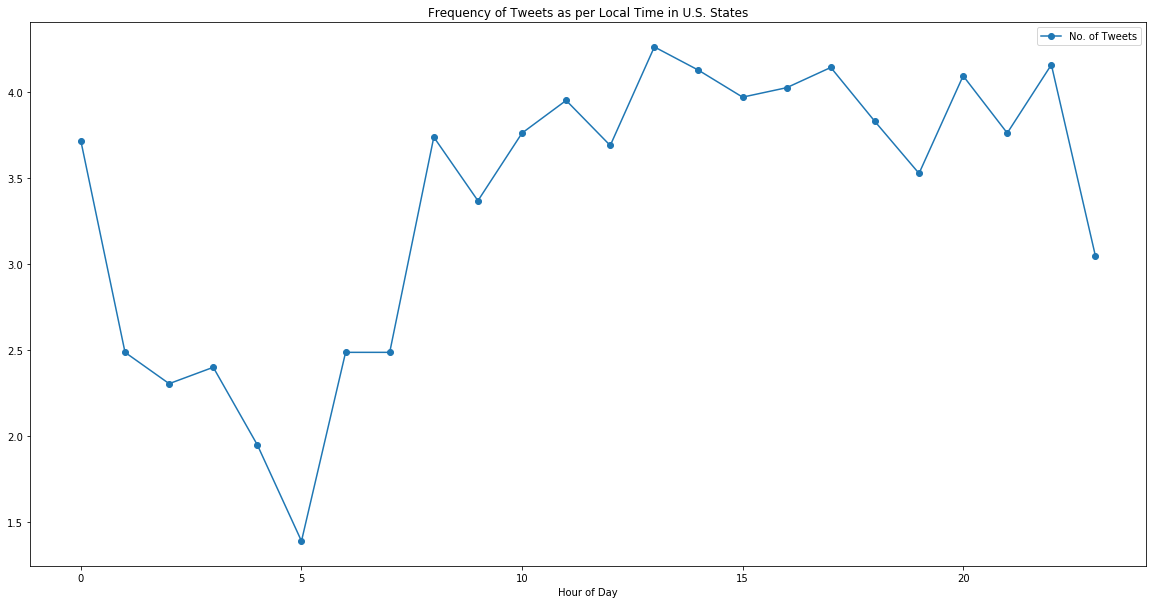

In [72]:
df_h = verified_pd.groupby('Hour of Day').size().reset_index(name="No. of Tweets")
df_h["No. of Tweets"] = df_h["No. of Tweets"].apply(np.log)
_, ax = plt.subplots(figsize=(20,10))

df_h.plot.line(x='Hour of Day', y='No. of Tweets', marker = 'o', ax=ax)
ax.set_title("Frequency of Tweets as per Local Time in U.S. States")


In [73]:
def timezone_mod(x):
    zones = -1
    try:
        x = unicode(x)
    except:
        return zones
    try:
        zones = (us.states.lookup(x).time_zones)[0]
    except Exception as e:
        pass
    
    return (zones)

tweet_pd['timezone'] = tweet_pd['us_state'].apply(timezone_mod)

In [26]:
time_pd = tweet_pd.groupby(['timezone']).size().reset_index(name='Freq')
time_pd = time_pd.sort_values(ascending = False, by = 'Freq')

In [27]:
time_pd

timezone     Freq
0                            -1  1183552
2               America/Chicago   477029
6              America/New_York   327998
5           America/Los_Angeles   111627
3                America/Denver    78498
4  America/Indiana/Indianapolis    15966
1             America/Anchorage     8166
8           America/Puerto_Rico     7732
9              Pacific/Honolulu     6904
7   America/North_Dakota/Center     5397

In [28]:
time_pd = time_pd[time_pd['timezone']!=-1]

In [29]:
time_pd

timezone    Freq
2               America/Chicago  477029
6              America/New_York  327998
5           America/Los_Angeles  111627
3                America/Denver   78498
4  America/Indiana/Indianapolis   15966
1             America/Anchorage    8166
8           America/Puerto_Rico    7732
9              Pacific/Honolulu    6904
7   America/North_Dakota/Center    5397

In [30]:
time_pd['freq_log'] = time_pd['Freq'].apply(np.log)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
time_pd

timezone    Freq   freq_log
2               America/Chicago  477029  13.075333
6              America/New_York  327998  12.700763
5           America/Los_Angeles  111627  11.622918
3                America/Denver   78498  11.270828
4  America/Indiana/Indianapolis   15966   9.678217
1             America/Anchorage    8166   9.007734
8           America/Puerto_Rico    7732   8.953123
9              Pacific/Honolulu    6904   8.839856
7   America/North_Dakota/Center    5397   8.593599

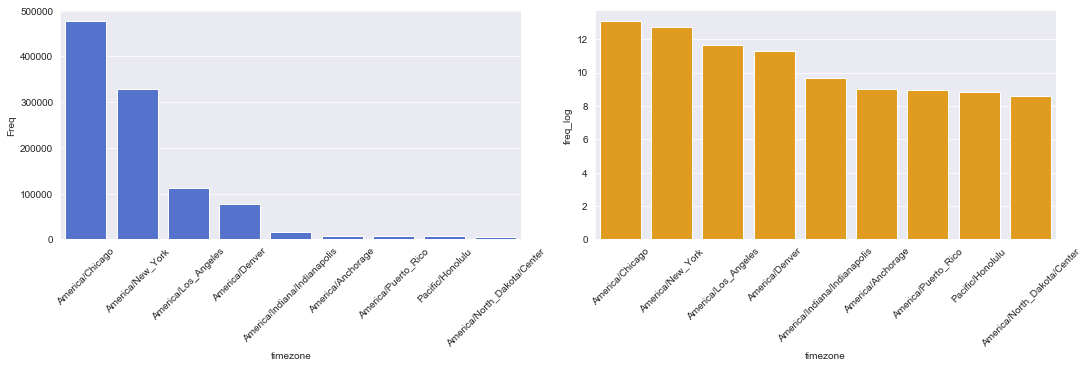

In [32]:
_, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 5), constrained_layout=True)
sns.barplot(x= "timezone", y="Freq", data = time_pd , ax = ax1, palette=['royalblue'])
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
    
sns.barplot(x= "timezone", y="freq_log", data = time_pd , ax = ax2, palette=['orange'])
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

In [33]:
time_lst = ["Pacific/Honolulu", "America/Anchorage", "America/Los_Angeles", "America/Denver", "America/North_Dakota/Center",
           "America/Chicago", "America/Indiana/Indianapolis", "America/New_York", "America/Puerto_Rico"]
freq_lst = [6904, 8166, 111627, 78498, 5397, 477029, 15966, 327998, 7732]

time_geo_pd = pd.DataFrame()
time_geo_pd['Timezone'] = time_lst
time_geo_pd['Tweet Freq'] = freq_lst

In [34]:
time_geo_pd

Timezone  Tweet Freq
0              Pacific/Honolulu        6904
1             America/Anchorage        8166
2           America/Los_Angeles      111627
3                America/Denver       78498
4   America/North_Dakota/Center        5397
5               America/Chicago      477029
6  America/Indiana/Indianapolis       15966
7              America/New_York      327998
8           America/Puerto_Rico        7732

In [35]:
unq_users = tweet_pd.drop_duplicates(subset=['screen_name'])
print(unq_users.shape)

(1717662, 18)


In [36]:
unq_users.head()

created_at  \
0  Sat Jun 07 16:18:08 +0000 2014   
2  Tue Apr 26 20:17:29 +0000 2016   
3  Fri May 31 13:00:11 +0000 2013   
4  Mon Oct 15 03:28:18 +0000 2018   
5  Mon Feb 01 01:43:32 +0000 2016   

                                         description  favourites_count  \
0                                                NaN            6923.0   
2                                                NaN           74775.0   
3                         jeune homme d'affaire 📝😁           46887.0   
4  Just a regular guy. Love Chicago Cubs/Baseball...             730.0   
5                                             MIHO💓          106804.0   

   followers_count friends_count  geo            id               id_str  \
0            752.0           606  NaN  2.552891e+09           2552891030   
2            294.0           380  NaN  7.250562e+17   725056222009909250   
3            600.0          1055  NaN  1.472121e+09           1472120575   
4           1530.0          2896  NaN  1.051676e+18  1051676108599558145   
5            217.0           339  NaN  4.842451e+09           4842450781   

   listed_count            location place      screen_name  statuses_count  \
0           NaN          Argentina    NaN     milagrosbar_         13514.0   
2           NaN     California, USA   NaN     lesliejoan58         61129.0   
3           NaN     Abidjan, cocody   NaN        LoicYvans         24769.0   
4           NaN      Wisconsin, USA   NaN  MichaelHasenst2          1099.0   
5           NaN  Manila,Philippines   NaN    juvyventura28         64548.0   

     us_state verified Latitude Belt Climate Belt             timezone  
0    Missouri      NaN       Central     Sun Belt      America/Chicago  
2  California      NaN       Central     Sun Belt  America/Los_Angeles  
3    Nebraska      NaN       Central           -1      America/Chicago  
4   Wisconsin      NaN         North           -1      America/Chicago  
5   Minnesota      NaN         North   Frost Belt      America/Chicago

In [37]:
def profession(x):
    global count
    x = str(x)
    doctor = ['doctor','cardiologist','dermatologist','physician','gynae','pediatrician','sexologist','psychiatrist','surgeon','oncologist','dentist','therapist','nurse']
    engineer = ['coder','java','programmer','software','engineer','system security',' sde',' swe',"architect", 'manager','banker','investor','investment','quant','scientist']
    artist = [' actor ',' actress ','musician','performer','standup','comedian','guitarist','singer','vocalist','pianist','lyricist','poet','novelist']
    CXO = ['CTO ','CEO ','COO ', 'CFO ','CMO ','CSO ','CIO ','CISO ']
    academics = ['phd', 'masters', 'graduate', 'student', 'intern', 'professor', 'teacher', 'researcher', 'sophomore', 'freshman', 'undergrad', 'postgrad', 'postdoc', 'college'
               ,'university', 'school']
    lawyer = ["judge", "lawyer", "legal", "magistrate", " law "]
    
    for d in doctor:
        if d in x.lower():
            return "Medical"
    
    for d in engineer:
        if d in x.lower():
            return "STEM/Finance"
        
    for d in artist:
        if d in x.lower():
            return "Artist"
        
    for d in lawyer:
        if d in x.lower():
            return "Law"
    
    for d in CXO:
        if d in x:
            return "CXO"
    
    for d in academics:
        if d in x.lower():
            return "Academics"
        
    return "Other"
           
unq_users['Profession'] = unq_users['description'].apply(profession)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
job_pd = unq_users.groupby(['Profession']).size().reset_index(name='freq')
job_pd = job_pd.sort_values(ascending = False, by = 'freq')

In [39]:
job_pd = job_pd[job_pd['Profession']!= "Other"]

In [40]:
job_pd

Profession   freq
0     Academics  40442
6  STEM/Finance  24112
1        Artist  11672
3           Law   6749
4       Medical   6168
2           CXO   2496

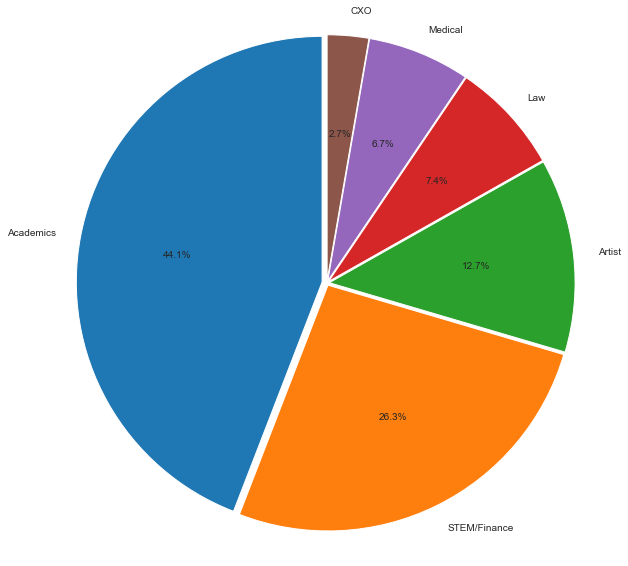

In [41]:
labels = 'Academics', 'STEM/Finance', 'Artist', 'Law', 'Medical', 'CXO'
sizes = [40442, 24112, 11672, 6749, 6168, 2496]
explode = ( 0.02 ,0.01,0.01, 0.01, 0.01, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [42]:
with_lang_pd = pd.read_csv("data/data_2.csv",lineterminator='\n')

In [43]:
with_lang_pd_nodup = with_lang_pd.drop_duplicates(subset=['screen_name'])

In [44]:
check = with_lang_pd_nodup.groupby(['lang']).size().reset_index(name='freq')
check = check.sort_values(ascending = False, by = 'freq')

In [45]:
check = check[check['lang']!= "und"]

In [46]:
check.head(10)

lang    freq
12   en  892081
28   ja  476545
13   es  223866
46   pt  172761
1    ar  149166
32   ko  127154
56   th   87367
24   in   60934
18   fr   53858
58   tr   45292

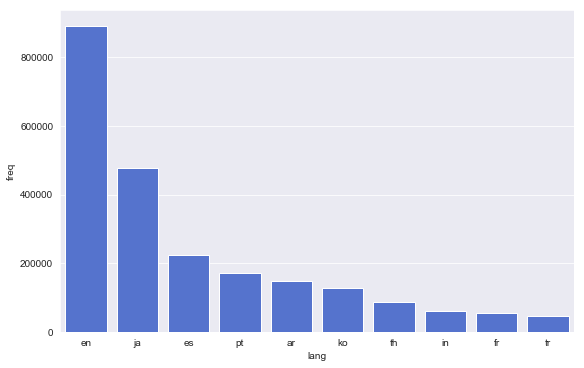

In [47]:
_, ax1 = plt.subplots(1,1, figsize=(8, 5), constrained_layout=True)
sns.barplot(x= "lang", y="freq", data = check.head(10) , ax = ax1, palette=['royalblue'])

In [48]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [49]:
tweet_pd['code'] = tweet_pd['us_state'].transform(lambda x: us_state_abbrev[x] if x in us_state_abbrev.keys() else 'other')

In [50]:
state_code = tweet_pd.groupby(['code']).size().reset_index(name='freq')
state_code = state_code.sort_values(ascending = False, by = 'freq')

In [51]:
state_code = state_code[state_code['code']!= "other"]
state_code

code   freq
44   TX  97613
4    CA  70396
24   MO  57598
14   IL  52360
10   GA  40812
34   NY  39617
9    FL  38212
16   KS  36487
25   MS  33712
12   IA  30775
17   KY  28846
13   ID  27571
2    AR  25830
35   OH  25712
23   MN  23660
38   PA  21297
18   LA  21177
22   MI  19879
42   SD  17794
36   OK  17789
48   WA  17688
27   NC  16833
50   WV  16454
29   NE  16383
15   IN  15966
46   VA  15895
41   SC  15814
37   OR  15363
32   NM  14171
5    CO  13856
31   NJ  12572
1    AL  12442
45   UT  11473
26   MT  11369
49   WI  11118
3    AZ  10781
19   MA  10423
20   MD   8355
33   NV   8180
0    AK   8166
43   TN   8120
39   PR   7732
11   HI   6904
28   ND   5397
51   WY   3448
6    CT   3420
8    DE   3162
40   RI   2851
7    DC   2414
21   ME   2409
47   VT   1587
30   NH   1434

In [52]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=state_code['code'], # Spatial coordinates
    z = state_code['freq'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Tweet Frequency",
))

fig.update_layout(
    title_text = 'Tweets all over USA',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [53]:
bool_val = tweet_pd['us_state'].isin(['Texas', 'California', 'Missouri', 'Illinois', 'Georgia', 'New York', 'Florida',
                                          'Kansas', 'Mississippi', 'Iowa'])

In [54]:
tweet_pd_top = tweet_pd[bool_val]

In [55]:
tweet_pd_top.head()

created_at  \
0   Sat Jun 07 16:18:08 +0000 2014   
1   Sat Jun 07 16:18:08 +0000 2014   
2   Tue Apr 26 20:17:29 +0000 2016   
13  Tue Mar 11 05:05:01 +0000 2014   
15  Tue Apr 04 18:03:47 +0000 2017   

                                          description  favourites_count  \
0                                                 NaN            6923.0   
1                                                 NaN            6923.0   
2                                                 NaN           74775.0   
13           1 Samuel 12:21 🙏🏽🙏🏽 🇸🇻🇸🇻🇸🇻🇸🇻           23449.0   
15  NSFW! Pansexual Braixen with a drawing tablet....            4755.0   

    followers_count friends_count  geo            id              id_str  \
0             752.0           606  NaN  2.552891e+09          2552891030   
1             752.0           606  NaN  2.552891e+09          2552891030   
2             294.0           380  NaN  7.250562e+17  725056222009909250   
13            200.0           376  NaN  2.383190e+09          2383189556   
15            158.0           887  NaN  8.493216e+17  849321614881763329   

    listed_count         location place   screen_name  statuses_count  \
0            NaN       Argentina    NaN  milagrosbar_         13514.0   
1            NaN       Argentina    NaN  milagrosbar_         13514.0   
2            NaN  California, USA   NaN  lesliejoan58         61129.0   
13           NaN      Houston, TX   NaN   YasminM1998         12581.0   
15           NaN     New York, NY   NaN   Braixen_Fox          4296.0   

      us_state verified Latitude Belt Climate Belt             timezone code  
0     Missouri      NaN       Central     Sun Belt      America/Chicago   MO  
1     Missouri      NaN       Central     Sun Belt      America/Chicago   MO  
2   California      NaN       Central     Sun Belt  America/Los_Angeles   CA  
13       Texas      NaN         South     Sun Belt      America/Chicago   TX  
15    New York      NaN         North   Frost Belt     America/New_York   NY

In [56]:
tweet_pd_top.dtypes

created_at           object
description          object
favourites_count    float64
followers_count     float64
friends_count        object
geo                  object
id                  float64
id_str               object
listed_count        float64
location             object
place                object
screen_name          object
statuses_count      float64
us_state             object
verified             object
Latitude Belt        object
Climate Belt         object
timezone             object
code                 object
dtype: object

In [57]:
tweet_pd_top.head()

created_at  \
0   Sat Jun 07 16:18:08 +0000 2014   
1   Sat Jun 07 16:18:08 +0000 2014   
2   Tue Apr 26 20:17:29 +0000 2016   
13  Tue Mar 11 05:05:01 +0000 2014   
15  Tue Apr 04 18:03:47 +0000 2017   

                                          description  favourites_count  \
0                                                 NaN            6923.0   
1                                                 NaN            6923.0   
2                                                 NaN           74775.0   
13           1 Samuel 12:21 🙏🏽🙏🏽 🇸🇻🇸🇻🇸🇻🇸🇻           23449.0   
15  NSFW! Pansexual Braixen with a drawing tablet....            4755.0   

    followers_count friends_count  geo            id              id_str  \
0             752.0           606  NaN  2.552891e+09          2552891030   
1             752.0           606  NaN  2.552891e+09          2552891030   
2             294.0           380  NaN  7.250562e+17  725056222009909250   
13            200.0           376  NaN  2.383190e+09          2383189556   
15            158.0           887  NaN  8.493216e+17  849321614881763329   

    listed_count         location place   screen_name  statuses_count  \
0            NaN       Argentina    NaN  milagrosbar_         13514.0   
1            NaN       Argentina    NaN  milagrosbar_         13514.0   
2            NaN  California, USA   NaN  lesliejoan58         61129.0   
13           NaN      Houston, TX   NaN   YasminM1998         12581.0   
15           NaN     New York, NY   NaN   Braixen_Fox          4296.0   

      us_state verified Latitude Belt Climate Belt             timezone code  
0     Missouri      NaN       Central     Sun Belt      America/Chicago   MO  
1     Missouri      NaN       Central     Sun Belt      America/Chicago   MO  
2   California      NaN       Central     Sun Belt  America/Los_Angeles   CA  
13       Texas      NaN         South     Sun Belt      America/Chicago   TX  
15    New York      NaN         North   Frost Belt     America/New_York   NY

In [24]:
import calendar
def tz_func(x):
    c_t = x[0]
    tzinfo = x[1]
    try:
        datetime_object = datetime.strptime(c_t, '%a %b %d %H:%M:%S +0000 %Y')
        t = timezone(tzinfo)
        g = timezone('GMT')
        g_d = g.localize(datetime_object)
        e_d = g_d.astimezone(t)
    except:
        return -1

    return e_d.hour


def tz_day(x):
    c_t = x[0]
    tzinfo = x[1]
    try:
        datetime_object = datetime.strptime(c_t, '%a %b %d %H:%M:%S +0000 %Y')
        t = timezone(tzinfo)
        g = timezone('GMT')
        g_d = g.localize(datetime_object)
        e_d = g_d.astimezone(t)
    except:
        return -1
    
    return calendar.day_name[e_d.weekday()]



In [25]:
tweet_pd_top['Hour of Day'] = tweet_pd_top[['created_at', 'timezone']].apply(lambda x: tz_func(x.values), axis=1)

NameError: name 'tweet_pd_top' is not defined

In [60]:
tweet_pd_top = tweet_pd_top[tweet_pd_top['Hour of Day']!=-1]

In [26]:
tweet_pd['Hour of Day'] = tweet_pd[['created_at', 'timezone']].apply(lambda x: tz_func(x.values), axis=1)

In [27]:
tweet_pd = tweet_pd[tweet_pd['Hour of Day']!=-1]

In [28]:
df_h = tweet_pd.groupby('Hour of Day').size().reset_index(name="No. of Tweets")

Text(0.5,1,'Frequency of Tweets as per Local Time in U.S. States')

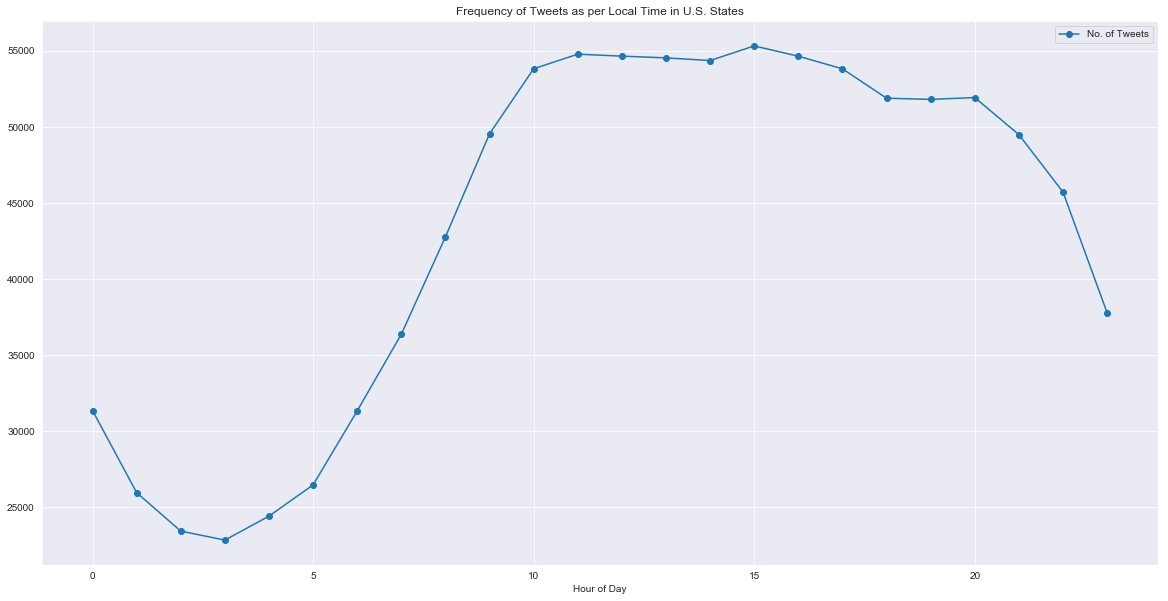

In [64]:
# df_h = tweet_pd.groupby('Hour of Day').size().reset_index(name="No. of Tweets")
_, ax = plt.subplots(figsize=(20,10))

df_h.plot.line(x='Hour of Day', y='No. of Tweets', marker = 'o', ax=ax)
ax.set_title("Frequency of Tweets as per Local Time in U.S. States")


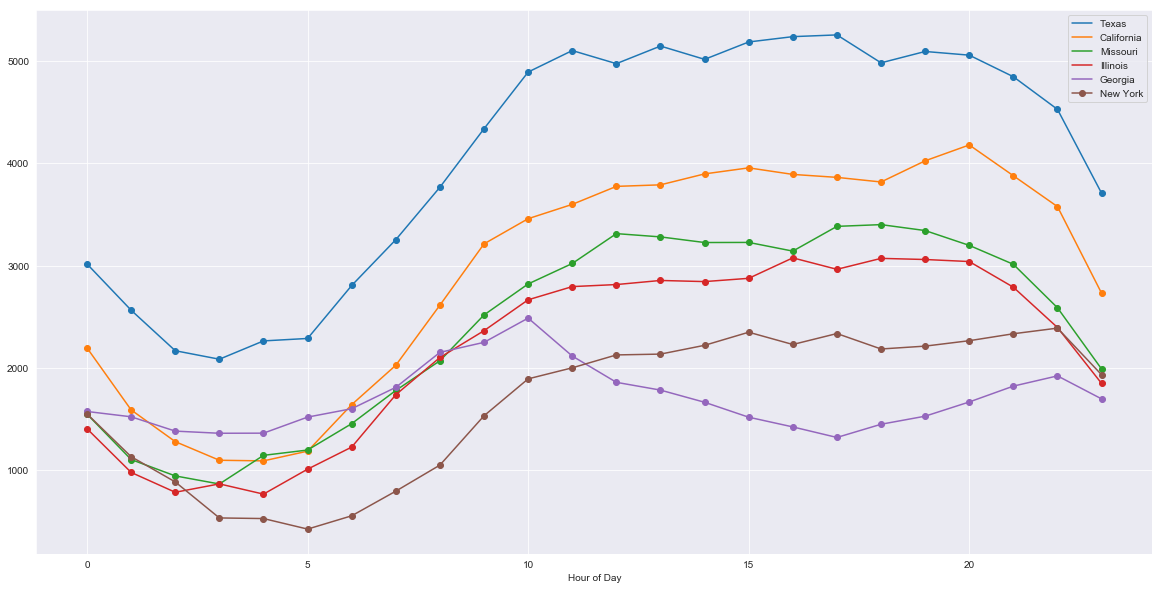

In [65]:
_, ax = plt.subplots(figsize=(20,10))
st_list = ['Texas', 'California', 'Missouri', 'Illinois', 'Georgia', 'New York']

for st in st_list:
    df_s = tweet_pd_top[tweet_pd_top['us_state'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

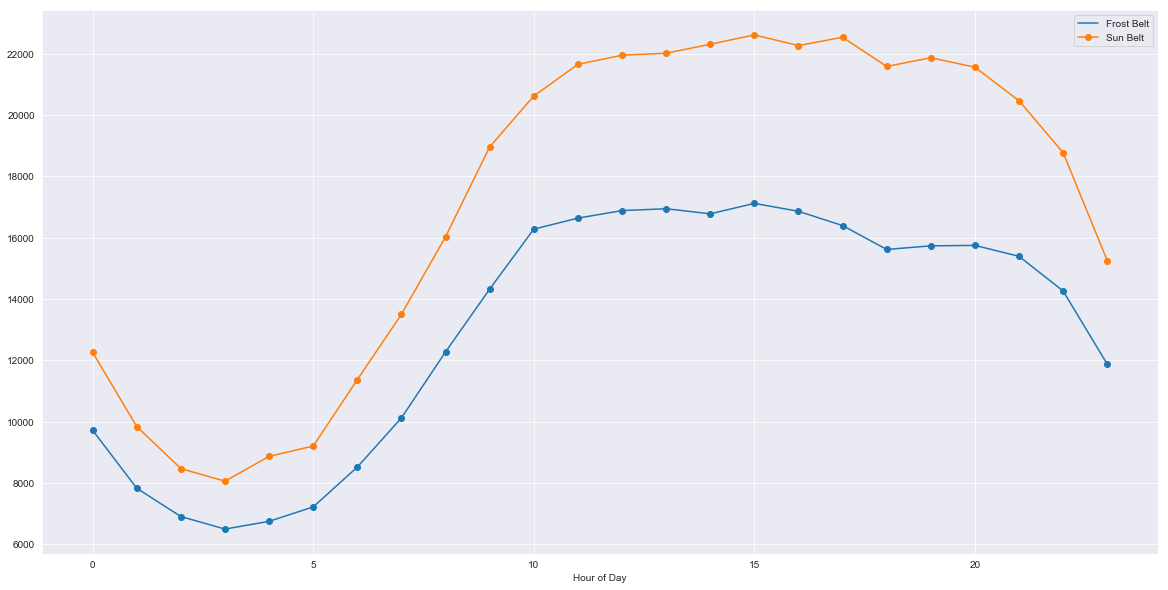

In [66]:
_, ax = plt.subplots(figsize=(20,10))
st_list = [ "Frost Belt", "Sun Belt"]

for st in st_list:
    df_s = tweet_pd[tweet_pd['Climate Belt'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

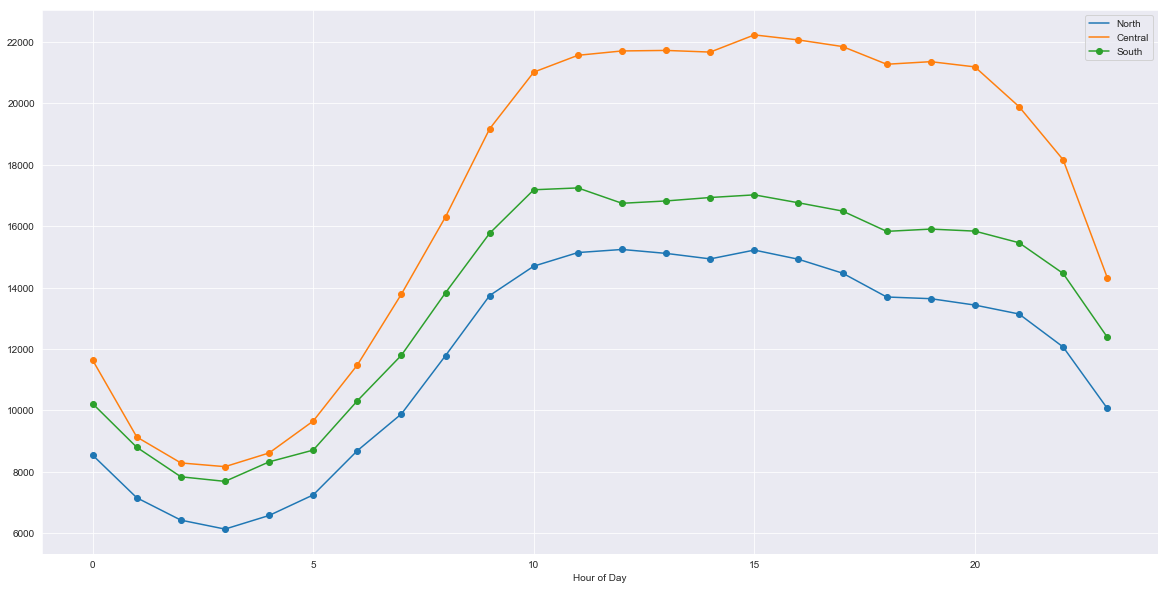

In [67]:
_, ax = plt.subplots(figsize=(20,10))
st_list = ['North', 'Central', 'South' ]

for st in st_list:
    df_s = tweet_pd[tweet_pd['Latitude Belt'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

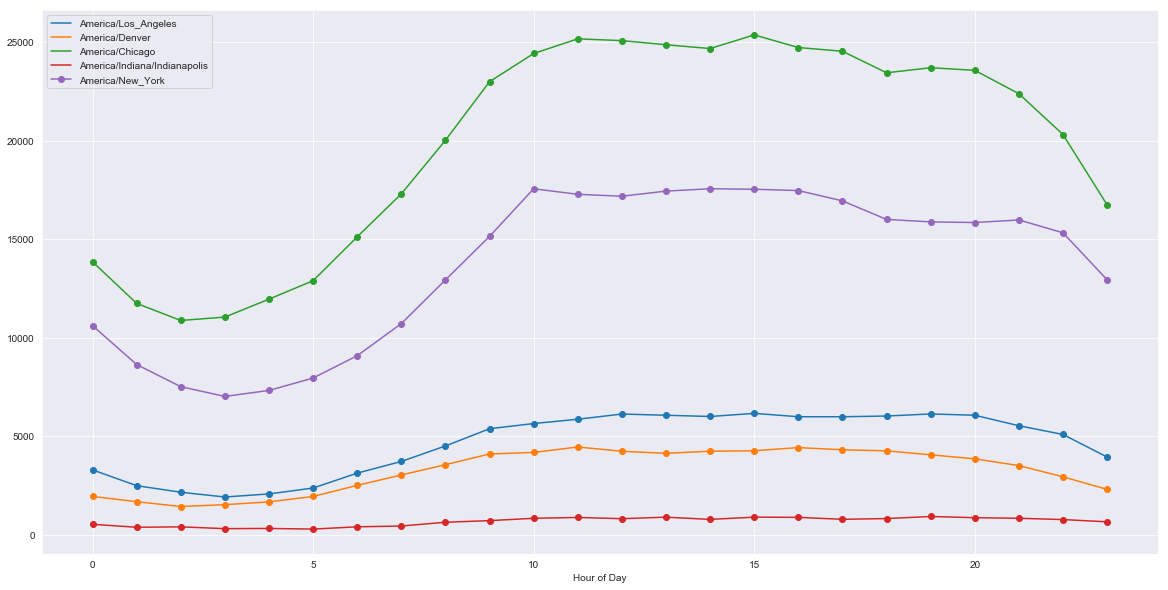

In [68]:
st_list = ["America/Los_Angeles", "America/Denver",
      "America/Chicago", "America/Indiana/Indianapolis", "America/New_York"]
_, ax = plt.subplots(figsize=(20,10))

for st in st_list:
    df_s = tweet_pd[tweet_pd['timezone'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

In [69]:
unq_users['Hour of Day'] = unq_users[['created_at', 'timezone']].apply(lambda x: tz_func(x.values), axis=1)

In [70]:
time_usr = unq_users[unq_users['Hour of Day']!=-1]

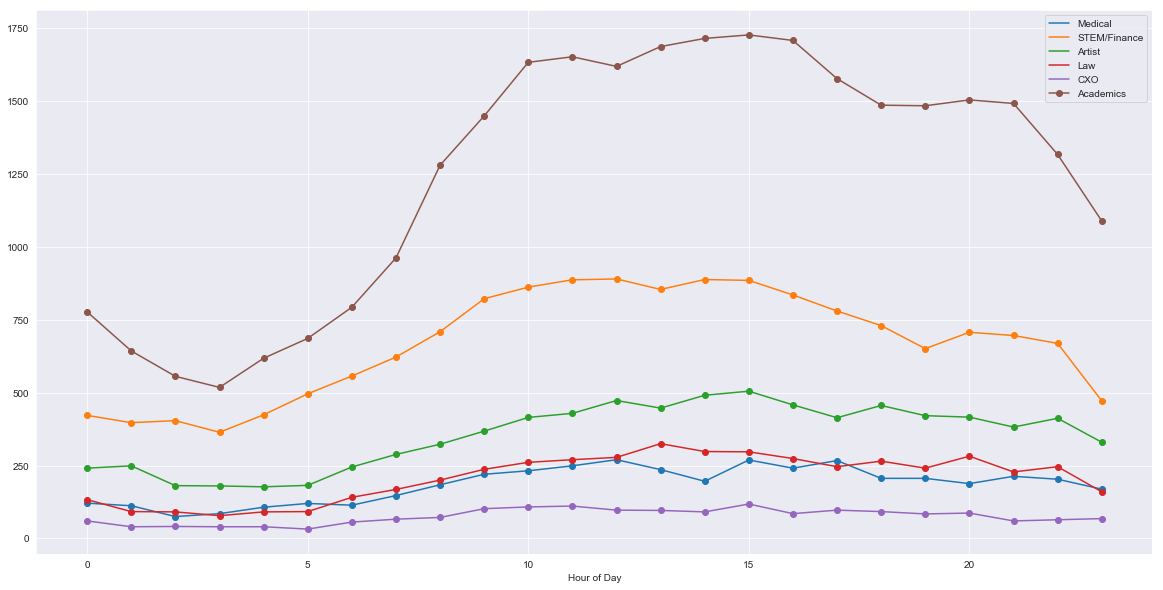

In [71]:
st_list = ["Medical", "STEM/Finance", "Artist", "Law", "CXO", "Academics"]
_, ax = plt.subplots(figsize=(20,10))

for st in st_list:
    df_s = time_usr[time_usr['Profession'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

In [72]:
with_lang_pd_nodup.head()

created_at  \
0  Wed May 18 09:48:39 +0000 2016   
1  Wed Nov 01 17:11:11 +0000 2017   
2  Sat Dec 05 14:16:59 +0000 2015   
3  Mon Feb 06 14:27:25 +0000 2017   
4  Wed Mar 09 18:23:56 +0000 2016   

                                         description                  id  \
0  酒クズのともじいですよぉ。デレマス 佐藤心P／しゅがしゅーこ／あんきら   最近スタァライト...  732870506655817728   
1                                                NaN  925772216293142528   
2  #MAGA #TrumpIsMyPresident #CommonCoreSucks #US...          4383818914   
3                 눙물 | 자동·메인트 확인 | 링크 눙퀘박스 | RT=동의 X  828611056671027202   
4                                                NaN  707633029817171972   

               id_str       location  favourites_count  followers_count  \
0  732870506655817728            NaN             12487              437   
1  925772216293142528      ประเทศไทย               803               61   
2          4383818914  United States            148162             9406   
3  828611056671027202            NaN             46379               50   
4  707633029817171972            NaN              3295              161   

   friends_count  screen_name  statuses_count  verified  listed_count  geo  \
0            139     yrtm_ftb           23752     False            20  NaN   
1             69      jam6714            1208     False             0  NaN   
2          10235     jbug9969          132899     False             9  NaN   
3            100  nungmul_1st          101672     False             1  NaN   
4            676   NancyMokry            7730     False             1  NaN   

  place lang  
0   NaN   ja  
1   NaN   th  
2   NaN   en  
3   NaN   ko  
4   NaN   es

In [74]:
with_lang_pd_nodup.to_csv("data/with_lang_pd_nodup.csv")

In [33]:
uscities = pd.read_csv('data/uscities.csv')
uscities.columns
citydict = uscities.to_dict()

In [34]:
city_df = uscities[['city_ascii','state_name']]
county_df = uscities[['county_name','state_name']]
state_df= uscities[['state_id','state_name']]
time_df = uscities[['state_name','timezone']]

city_dict = city_df.set_index('city_ascii').to_dict(orient = 'index')
county_dict = county_df.set_index('county_name').to_dict(orient = 'index')
state_dict = state_df.set_index('state_id').to_dict(orient = 'index')
time_dict = time_df.set_index('state_name').to_dict(orient = 'index')

In [35]:
def city_location(x):
   
    
    try:
        names = ['usa','united states','america']


        for k in state_dict.keys():
            if state_dict[k]['state_name'].lower() in x.lower() :
                return state_dict[k]['state_name']

        for k in state_dict.keys():
            if k in x:
                return state_dict[k]['state_name']

        for k in county_dict.keys():
            l = k.lower()
            if l in x.lower():
                return county_dict[k]['state_name']

        for k in city_dict.keys():
            l = k.lower()
            if l in x.lower():
                return city_dict[k]['state_name']

        if x == "US":
            return "usa"

        for n in names:
            if n in x.lower():
                return "usa"
    except:
        pass
    
    return "undefined"

# with_lang_pd_nodup['us_state'] = with_lang_pd_nodup['location'].transform(city_location)

In [78]:
with_lang_pd_nodup['us_state'].head()


0      undefined
1      undefined
2    Mississippi
3      undefined
4      undefined
Name: us_state, dtype: object

In [79]:
with_lang_pd_nodup.to_csv("data/combined_data_with_states.csv")

In [80]:
with_lang_pd_nodup['timezone'] = with_lang_pd_nodup['us_state'].apply(timezone_mod)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [81]:
with_lang_pd_nodup['Hour of Day'] = with_lang_pd_nodup[['created_at', 'timezone']].apply(lambda x: tz_func(x.values), axis=1)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [84]:
# with_lang_pd_nodup.head()
with_lang_pd_nodup_minus1 = with_lang_pd_nodup[with_lang_pd_nodup['Hour of Day']!=-1]

In [97]:
with_lang_pd_nodup_minus1 = with_lang_pd_nodup_minus1[with_lang_pd_nodup_minus1['lang']!='und']

In [98]:
temp_df  = with_lang_pd_nodup_minus1.groupby('lang').size().reset_index(name='freq')


In [107]:
temp_df = temp_df.sort_values(ascending=False, by='freq')
temp_df.head(10)

lang    freq
12   en  437638
13   es   90797
46   pt   57476
28   ja   19269
1    ar   19167
18   fr   15786
56   th   13885
57   tl   13073
24   in   12765
32   ko   10821

In [120]:
# st_list = list(with_lang_pd_nodup_minus1['lang'].unique())
st_list = ['ja','th','in','ko']

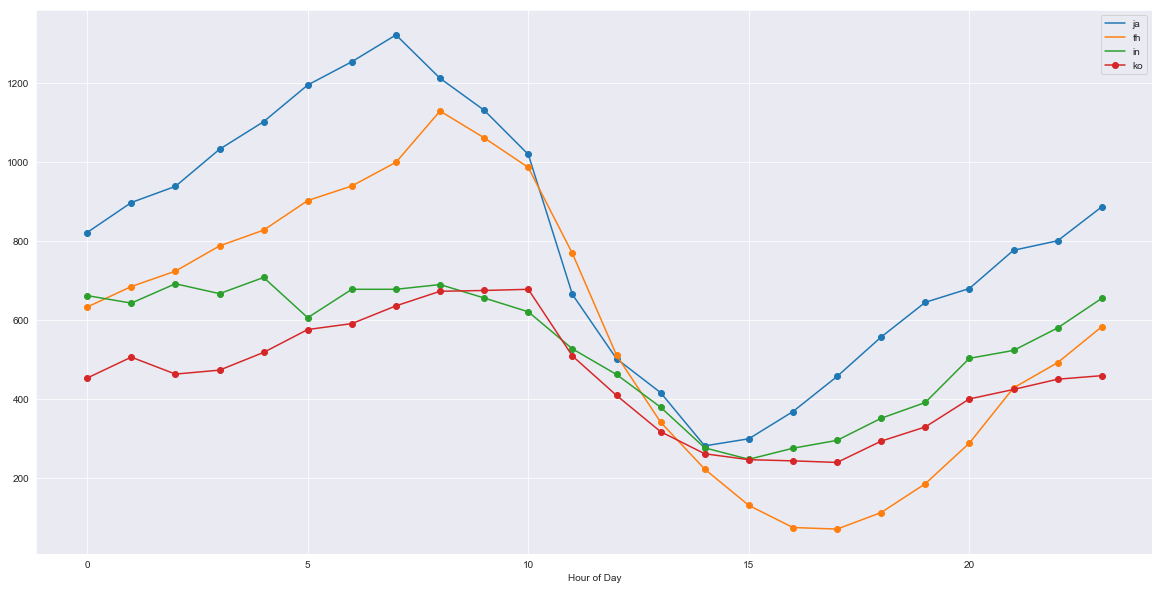

In [121]:
# st_list = ["Medical", "STEM/Finance", "Artist", "Law", "CXO", "Academics"]
_, ax = plt.subplots(figsize=(20,10))

for st in st_list:
    df_s = with_lang_pd_nodup_minus1[with_lang_pd_nodup_minus1['lang'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

In [123]:
#holidays 

'''
NY '2015-12-31','2016-01-01'

Xmas '2015-12-24','2015-12-25','2015-12-26'

Indepen '2015-07-04',2015-07-03'

hallow '2015-10-31',2015-10-30'

thsgiving '2015-11-26','2015-11-25'

patrick . '2015-03-17','2015-03-18'

super bowl '2016-02-07'

holi '2015-03-05','2015-03-06'

diwali '2015-11-11'

chinese NY '2015-02-19'

'''


holiday = ['2015-12-31','2016-01-01', '2015-12-24','2015-12-25','2015-12-26','2015-07-04','2015-07-03','2015-10-31','2015-10-30',
          '2015-11-26','2015-11-25','2015-03-17','2015-03-18','2016-02-07','2015-03-05','2015-03-06','2015-11-11','2015-02-19','2015-02-18']

temp = []

for h in holiday:
    h = h.replace("-","_")
    temp.append(h)

holiday = temp
print (holiday)


import os

for h in holiday:
    os.system("cp /gpfs/projects/CSE519/"+str(h)+"* .")
    


import json
import pandas as pd
import csv
import os
import glob
import gzip

columns = ['created_at', 'description', 'id', 'id_str', 'location', 'favourites_count', 'followers_count',
           'friends_count', 'screen_name', 'statuses_count', 'verified', 'listed_count', 'geo', 'place', 'lang']

files = glob.glob('/gpfs/projects/CSE519/2015_12_31*')


def jstring(filename):
    jsonString= "["
    
    with gzip.open(filename,'rb') as fp:
        line = fp.readline()
        while line:
            try :
                temp = json.loads(line)
                jsonString += (line+",")
                line = fp.readline()
            except:
                continue
                
            
    jsonString = jsonString[:-1] + "]"
    return json.loads(jsonString)


def getLists(jsonString):
    myjson = jsonString
    delete_list, created_list = [],[]
    for l in jsonString:
        try :
            if l['created_at'] is not None:
                l['user']['geo'] = l['geo']
                l['user']['place'] = l['place']
                l['user']['lang'] = l['lang']
                created_list.append(l['user'])
        except:
            delete_list.append(l)
    return delete_list, created_list

def getpd(filename):
    jsonString = jstring(filename)
    print(len(jsonString))
    delete_list, created_list = getLists(jsonString)
    created_df = pd.DataFrame(created_list)
    created_df = created_df[columns]
    return created_df

def getzippedfile(df1, df2):
    frames = [df1, df2]
    return pd.concat(frames)

def csv_save(df, file):
    df.to_csv(file, encoding = 'utf-8', index = None, header=True)
    

main_df = pd.DataFrame()
for fl in files:
    print (fl,"file loaded")
    result = getpd(fl)
    
    main_df = getzippedfile(main_df,result)
    print (fl,"file done")

csv_save(main_df, "combineddata.csv")
    
    
        



SyntaxError: invalid syntax (<ipython-input-123-04391138c9b6>, line 56)

In [124]:
tweet_pd.head()

created_at  \
0  Sat Jun 07 16:18:08 +0000 2014   
1  Sat Jun 07 16:18:08 +0000 2014   
2  Tue Apr 26 20:17:29 +0000 2016   
3  Fri May 31 13:00:11 +0000 2013   
4  Mon Oct 15 03:28:18 +0000 2018   

                                         description  favourites_count  \
0                                                NaN            6923.0   
1                                                NaN            6923.0   
2                                                NaN           74775.0   
3                         jeune homme d'affaire 📝😁           46887.0   
4  Just a regular guy. Love Chicago Cubs/Baseball...             730.0   

   followers_count friends_count  geo            id               id_str  \
0            752.0           606  NaN  2.552891e+09           2552891030   
1            752.0           606  NaN  2.552891e+09           2552891030   
2            294.0           380  NaN  7.250562e+17   725056222009909250   
3            600.0          1055  NaN  1.472121e+09           1472120575   
4           1530.0          2896  NaN  1.051676e+18  1051676108599558145   

   listed_count         location place      screen_name  statuses_count  \
0           NaN       Argentina    NaN     milagrosbar_         13514.0   
1           NaN       Argentina    NaN     milagrosbar_         13514.0   
2           NaN  California, USA   NaN     lesliejoan58         61129.0   
3           NaN  Abidjan, cocody   NaN        LoicYvans         24769.0   
4           NaN   Wisconsin, USA   NaN  MichaelHasenst2          1099.0   

     us_state verified Latitude Belt Climate Belt             timezone code  \
0    Missouri      NaN       Central     Sun Belt      America/Chicago   MO   
1    Missouri      NaN       Central     Sun Belt      America/Chicago   MO   
2  California      NaN       Central     Sun Belt  America/Los_Angeles   CA   
3    Nebraska      NaN       Central           -1      America/Chicago   NE   
4   Wisconsin      NaN         North           -1      America/Chicago   WI   

   Hour of Day  
0           11  
1           11  
2           13  
3            8  
4           22

In [135]:
tweet_pd["day"]  = tweet_pd[["created_at","timezone"]].apply(lambda x: tz_day(x.values), axis=1)

In [136]:
tweet_pd.head(100)

created_at  \
0    Sat Jun 07 16:18:08 +0000 2014   
1    Sat Jun 07 16:18:08 +0000 2014   
2    Tue Apr 26 20:17:29 +0000 2016   
3    Fri May 31 13:00:11 +0000 2013   
4    Mon Oct 15 03:28:18 +0000 2018   
5    Mon Feb 01 01:43:32 +0000 2016   
8    Sun Jul 01 17:40:38 +0000 2018   
11   Sat Sep 28 19:27:48 +0000 2013   
13   Tue Mar 11 05:05:01 +0000 2014   
15   Tue Apr 04 18:03:47 +0000 2017   
17   Mon Jul 23 17:09:33 +0000 2018   
19   Fri Dec 23 23:00:51 +0000 2016   
22   Sun Jan 22 23:19:18 +0000 2012   
27   Wed May 18 18:34:24 +0000 2011   
28   Tue May 08 01:24:34 +0000 2012   
38   Tue Jun 02 00:32:08 +0000 2009   
41   Fri Jul 13 03:28:24 +0000 2018   
43   Tue May 22 23:04:00 +0000 2018   
44   Fri May 14 00:10:22 +0000 2010   
47   Sun Jun 19 02:13:51 +0000 2011   
49   Tue Apr 04 17:05:14 +0000 2017   
50   Sun Mar 11 11:32:53 +0000 2012   
51   Mon Mar 12 04:24:05 +0000 2012   
53   Tue Mar 25 23:01:12 +0000 2008   
54   Sun Mar 17 22:51:45 +0000 2013   
56   Mon Nov 17 01:26:56 +0000 2014   
61   Fri Mar 04 18:35:46 +0000 2011   
62   Fri Aug 10 03:04:50 +0000 2018   
63   Sat Dec 26 16:47:54 +0000 2015   
67   Mon Nov 03 02:54:11 +0000 2014   
..                              ...   
147  Thu Jan 14 19:36:55 +0000 2010   
148  Sat May 24 17:28:27 +0000 2014   
151  Fri Jun 29 15:39:45 +0000 2012   
152  Fri Dec 12 03:49:37 +0000 2014   
153  Sat May 24 17:28:27 +0000 2014   
154  Wed May 16 14:30:41 +0000 2012   
159  Sun Feb 05 19:04:07 +0000 2012   
160  Mon Jun 30 05:38:26 +0000 2014   
161  Sat Aug 26 19:09:44 +0000 2017   
162  Fri Sep 20 00:37:01 +0000 2013   
163  Thu Aug 18 16:07:50 +0000 2011   
164  Sat Jul 07 01:04:37 +0000 2012   
168  Sun Dec 28 14:05:59 +0000 2014   
170  Sun Sep 21 11:57:32 +0000 2014   
172  Wed Jun 06 00:30:33 +0000 2018   
174  Mon Jun 25 09:51:36 +0000 2012   
176  Mon Dec 08 00:01:42 +0000 2014   
177  Tue Feb 09 23:59:29 +0000 2010   
182  Wed Jan 15 20:18:57 +0000 2014   
184  Mon Aug 14 22:15:02 +0000 2017   
185  Wed Mar 25 02:45:30 +0000 2015   
187  Thu Sep 22 11:22:56 +0000 2016   
189  Fri Jun 27 01:55:13 +0000 2014   
192  Mon Jun 09 19:18:54 +0000 2014   
194  Fri Oct 03 21:12:27 +0000 2008   
196  Thu Jul 19 15:15:16 +0000 2018   
198  Fri Oct 14 11:32:09 +0000 2011   
200  Mon Mar 19 21:11:36 +0000 2012   
203  Mon Apr 16 02:37:00 +0000 2012   
204  Mon Mar 19 09:34:29 +0000 2012   

                                           description  favourites_count  \
0                                                  NaN            6923.0   
1                                                  NaN            6923.0   
2                                                  NaN           74775.0   
3                           jeune homme d'affaire 📝😁           46887.0   
4    Just a regular guy. Love Chicago Cubs/Baseball...             730.0   
5                                               MIHO💓          106804.0   
8                                                  NaN            1936.0   
11   Raquel Pilar ♡ College Student ♡ YouTuber ♡ I ...            2080.0   
13            1 Samuel 12:21 🙏🏽🙏🏽 🇸🇻🇸🇻🇸🇻🇸🇻           23449.0   
15   NSFW! Pansexual Braixen with a drawing tablet....            4755.0   
17               FIU '21 | scorpio | most likely bored            3941.0   
19      Donald J. Trump is Making America Great Again!             725.0   
22   Do you remember?\nThe ridingthe the passion th...            4978.0   
27         CALI, 🏠Mi ciudad, 💚Mi equipo y 🙏Mi vida.           16912.0   
28   tree-hugging yoga dork #RESIST 10th district #...           61013.0   
38                        Father of 2 boys. #BBN #HTTR            1135.0   
41        acoustic people come from the specific ocean             537.0   
43                                                  🍍             312.0   
44   #DanceAreDie SUBSCRIBE to my YOUYUBE channel f...              17.0   
47                               Principal, Consultant           62344.0   
49   #EXO| @weareoneEXO|@B_hu

In [174]:
weekend_pd = tweet_pd[tweet_pd["day"].isin(['Saturday','Sunday'])]

In [175]:
weekday_pd = tweet_pd[tweet_pd["day"].isin(['Tuesday','Monday','Wednesday', 'Thursday', 'Friday'])]

In [176]:
df_w = weekday_pd.groupby('Hour of Day').size().reset_index(name="Weekday")
sum_w = df_w['Weekday'].sum()
print(sum_w)

755096


In [179]:
df_w['Mean'] = df_w['Weekday'].transform(lambda x: float(x)/float(sum_w))

In [190]:
df_st = weekend_pd.groupby('Hour of Day').size().reset_index(name="Weekend")
sum_st = df_st['Weekend'].sum()
print(sum_st)

284191


In [191]:
df_st['end_Mean'] = df_st['Weekend'].transform(lambda x: float(x)/float(sum_st))

In [192]:
df_st

Hour of Day  Weekend  end_Mean
0             0     9597  0.033770
1             1     7902  0.027805
2             2     6822  0.024005
3             3     6691  0.023544
4             4     6709  0.023607
5             5     7298  0.025680
6             6     8506  0.029931
7             7     9504  0.033442
8             8    11411  0.040153
9             9    13296  0.046785
10           10    14338  0.050452
11           11    15127  0.053228
12           12    15068  0.053021
13           13    15031  0.052890
14           14    14830  0.052183
15           15    14528  0.051121
16           16    14290  0.050283
17           17    14137  0.049745
18           18    13755  0.048401
19           19    14000  0.049263
20           20    13997  0.049252
21           21    13553  0.047690
22           22    12741  0.044833
23           23    11060  0.038917

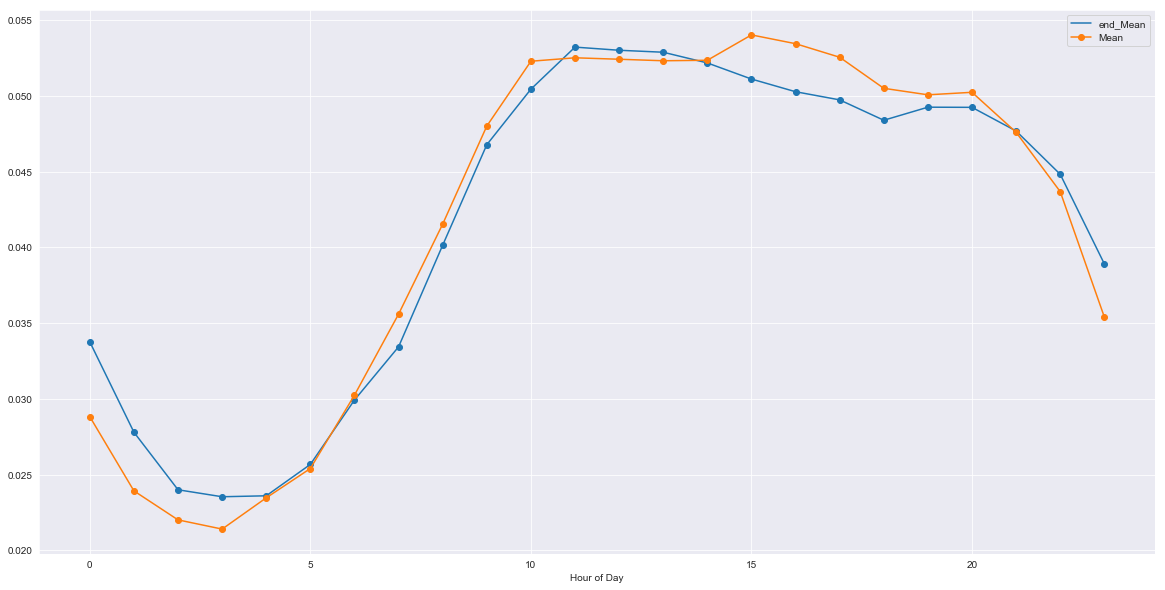

In [193]:
_, ax = plt.subplots(figsize=(20,10))

# df_w = weekday_pd.groupby('Hour of Day').size().reset_index(name="Tuesday")
# df_st = weekend_pd.groupby('Hour of Day').size().reset_index(name="Weekend")
df_st.plot.line(x='Hour of Day', y="end_Mean", marker = 'o', ax=ax)
df_w.plot.line(x='Hour of Day', y="Mean", marker = 'o', ax=ax)

In [38]:
#full pd
#us states
full_pd['us_state'] = full_pd['location'].transform(city_location)



In [39]:
full_pd.to_csv("data/full_pd.csv")